# Set Up The Environment

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import re
import os
import time
from ckiptagger import WS, POS, NER, construct_dictionary # tokenization

# Setup work directory
os.chdir('/Users/deankuo/Desktop/python/dissertation/Taiwan-Manifesto-Analysis-A-ML-Approach')
os.listdir()

# Import utils.py
from Utils.utils import (
    load_dataframe, 
    fill_education, 
    fill_age, 
    party_plot, 
    party_processing, 
    content_processing,
    dataset_cleaning,
    is_main_party,
    vote_calculate,
    )
matplotlib.rcParams['font.family'] = 'Times New Roman'

# CKIP module
CKIP_PATH = "../CKIP_TAGGER"
ws = WS(CKIP_PATH) # 斷詞
pos = POS(CKIP_PATH) # 詞性標註
ner = NER(CKIP_PATH) # 命名實體識別

2024-01-26 21:14:11.905536: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/deankuo/opt/anaconda3/lib/python3.8/site-packages/ckiptagger/model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
2024-01-26 21:14:22.652563: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with t

In [107]:
# 加入自定義字典
word_to_weight = {'823': 1, 'ECFA': 1, '2300': 1, '台26線': 1, '台74線': 1, '12年國教': 1, 'BOT': 1, '88快速道路': 1, '台27線': 1, '台61線': 1, '十二年國教': 1, '國道10號': 1,
                  '台88號': 1, 'M型': 1, '205兵工廠': 1, '北二高': 1, '台65線': 1, 'CEPA': 1, 'FTA': 1, '科學園區': 1, '228': 1, 'MIT': 1, '202兵工廠': 1, '86快速道路': 1, '國道8號': 1,
                  '台64': 1, '台66': 1, 'iBike': 1, 'MRT': 1, 'TPP': 1, 'TIFA': 1, 'TPP':1, '台22': 1, '台29': 1, '國10': 1, '國1': 1, '318': 1, 'NCC':1, 'PM2.5': 1, 'YouBike': 1, 
                  '台68': 1, '快速道路': 1, 'NGO': 1, 'NPO': 1, 'U-Bike': 1, 'LGBTQ': 1, '三七五減租': 1, '小三通': 1, '大三通': 1, '基礎建設': 1, '戒急用忍': 1, '社會役': 1, '非核家園': 1,
                  '教育券': 1, '九二共識': 1}
dictionary = construct_dictionary(word_to_weight)

# Raw Data Processing

In [184]:
# Read csv files
years = [1998, 2001, 2004, 2008, 2012, 2016, 2020]
dfs = dict()

for year in years:
    dfs[year] = pd.read_excel(f"./Data/manifesto_data/taiwan_manifesto_{year}.xlsx")

for key, value in dfs.items():
    dfs[key] = load_dataframe(value, int(key))

# Coding Rules

## Party

1: 國民黨  
2: 民進黨  
3: 親民黨  
4: 新黨  
5: 無黨團結聯盟  
6: 台聯黨  
7: 無黨籍  
8: 台灣民眾黨  
9: 時代力量  
10: 台灣團結聯盟  
20: 其他  

In [ ]:
# Party encoding
unique_counts = []

for year in years:
    df = dfs[year]
    unique_count = len(df['PARTY'].unique())
    unique_counts.append(unique_count)

In [185]:
for key, value in dfs.items():
    dfs[key] = party_processing(value)
    dfs[key] = content_processing(value)

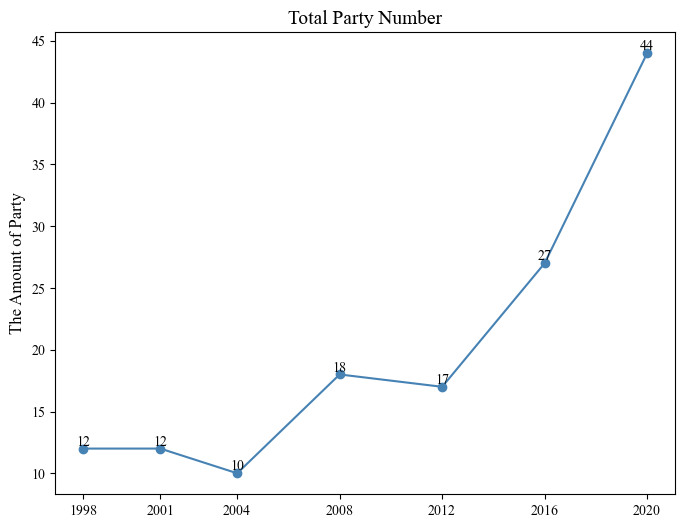

In [206]:
party_plot(unique_counts, years, save=True)

# Merge Voting Data and Manifesto Data

In [186]:
dfs_vote = {}
for year in years:
    dfs_vote[year] = pd.read_csv(f"./Data/vote_data/vote_{year}.csv")
    dfs_vote[year]['LNAME'] = dfs_vote[year]['LNAME'].apply(lambda x: x.strip())

## Vote Data Cleaning

In [179]:
dfs_vote_updated, education_differences = fill_education(dfs_vote)
dfs_vote_updated = fill_age(dfs_vote)
print("Education differences:", education_differences)


Education differences: []


In [183]:
for k, v in dfs_vote.items():
    v.to_csv(f'./Data/vote_data/vote_{k}.csv', encoding='utf-8-sig', index=False)

## Data Merge

In [196]:
for year in years:
    globals()[f'df_{year}'] = pd.merge(dfs[year], dfs_vote[year], on='LNAME', how='outer')
    
# 2008年的資料包含到補選候選人，需要先排除
df_2008 = df_2008.dropna(subset=['性別'])

# Data Cleaning

In [197]:
for year in years:
    globals()[f"df_{year}"] = dataset_cleaning(globals()[f"df_{year}"])

/var/folders/d5/cpy__59j3kn8blm5l3z7pckw0000gn/T/ipykernel_7646/2092097841.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ELE'] = df['當選註記'].apply(lambda x: 1 if x == "*" else 0)
/var/folders/d5/cpy__59j3kn8blm5l3z7pckw0000gn/T/ipykernel_7646/2092097841.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['現任'] = np.where(df['現任'].isin(['Y', 1, '是']), 1, 0)
/var/folders/d5/cpy__59j3kn8blm5l3z7pckw0000gn/T/ipykernel_7646/2092097841.py:18: SettingWithCopyWarning: 
A value is trying to be set on a

# Classify serious and non-serious candidates
- 依照公職人員選舉罷免法第43條第1項規定：候選人除全國不分區及僑居國外國民立法委員選舉外，當選人在一人，得票數達各該選舉區當選票數三分之一以上者，當選人在二人以上，得票數達各該選舉區當選票數二分之一以上者，應補貼其競選費用，每票補貼新臺幣三十元。但其最高額，不得超過各該選舉區候選人競選經費最高金額。
- 主要政黨有：國民黨、民進黨、親民黨、新黨、無黨團結聯盟、台聯黨、台灣民眾黨、時代力量、台灣團結聯盟

In [198]:
import uuid
for year in years:
    globals()[f'df_{year}']['ENOUGH_VOTE'] = globals()[f'df_{year}'].groupby('AREA', group_keys=False).apply(vote_calculate)
    globals()[f'df_{year}']['MAIN_PARTY_MEMBER'] = is_main_party(globals()[f'df_{year}'])
    globals()[f'df_{year}']['SERIOUS_CANDIDATE'] = globals()[f'df_{year}'][['ENOUGH_VOTE', 'MAIN_PARTY_MEMBER']].any(axis=1).astype(int)
    
    # uuid
    num_rows = len(globals()[f'df_{year}'])
    uuids = [str(uuid.uuid4()) for _ in range(num_rows)]
    globals()[f'df_{year}'].insert(0, 'ID', uuids)
    globals()[f'df_{year}'].to_excel(f'./Data/Dataset/{year}.xlsx', index=False)

# Combine The Dataset

In [200]:
# ALL Manifestos
df = pd.concat([df_1998, df_2001, df_2004, df_2008, df_2012, df_2016, df_2020]).reset_index(drop=True)
print(f"所有的資料筆數為： {len(df)}")
df.info()

所有的資料筆數為： 2499
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2499 non-null   object 
 1   LNAME              2499 non-null   object 
 2   TH                 2499 non-null   int64  
 3   AREA               2499 non-null   object 
 4   PARTY              2499 non-null   object 
 5   PARTY_CODE         2499 non-null   int64  
 6   GENDER             2499 non-null   int64  
 7   INCUMBENT          2499 non-null   int64  
 8   EDUCATION          2499 non-null   object 
 9   ELE                2499 non-null   int64  
 10  VOTES              2499 non-null   int64  
 11  VOTER_TURNOUT      2499 non-null   float64
 12  CONTENT            2499 non-null   object 
 13  ENOUGH_VOTE        2499 non-null   bool   
 14  MAIN_PARTY_MEMBER  2499 non-null   bool   
 15  SERIOUS_CANDIDATE  2499 non-null   int64  
dtypes: bool(2

In [201]:
df.to_excel('./Data/manifesto_dataset.xlsx', index=False)